# **Programación Cientifica para IA**
## ***Nicolás Patalagua***
### *Universidad Sergio Arboleda*
#### ***PANDAS***

## **¿Qué es Pandas?**

En Computación y Ciencia de datos, pandas es una biblioteca de software escrita como extensión de NumPy para manipulación y análisis de datos para el lenguaje de programación Python. En particular, ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales. Es un software libre distribuido bajo la licencia BSD versión tres cláusulas. *El nombre deriva del término "datos de panel", término de econometría que designa datos que combinan una dimensión temporal con otra dimensión transversal.*





# The American Presidency Project

The American Presidency Project, non-profit and non-partisan, is the source of presidential documents on the internet.  We are hosted at the University of California, Santa Barbara.

https://www.presidency.ucsb.edu/ 



## Presidential Job Approval

Question: Do you approve or disapprove of the way [enter President name] is handling his job as President?
*Data adapted from the Gallup Poll and compiled by Gerhard Peters *


https://www.presidency.ucsb.edu/statistics/data/presidential-job-approval

Importamos las librerias que vamos a usar.

In [0]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt

Leemos el archivo de American Presidency Project Potus.xlsx, con la variable Presidente y retornamos la cabecera.

In [0]:
President = pd.read_excel('POTUS.xlsx')
President.head()

,Start Date,End Date,Approving,Disapproving,Unsure/NoData
0,2017-01-17,2017-01-19,59,37,4
1,2017-01-15,2017-01-18,58,38,4
2,2017-01-14,2017-01-17,57,39,4
3,2017-01-13,2017-01-15,57,38,5
4,2017-01-12,2017-01-14,57,39,4


Vamos a mostrar los datos contenidos acerca del expresidente Barak Obama.

In [0]:
Obama=pd.read_excel('POTUS.xlsx',sheet_name='Barak Obama')
Obama["Barak Obama"]="Barak Obama"
Obama=Obama[["Barak Obama","Start Date","End Date","Approving","Disapproving","Unsure/NoData"]]
Obama.head()

,Barak Obama,Start Date,End Date,Approving,Disapproving,Unsure/NoData
0,Barak Obama,2017-01-17,2017-01-19,59,37,4
1,Barak Obama,2017-01-15,2017-01-18,58,38,4
2,Barak Obama,2017-01-14,2017-01-17,57,39,4
3,Barak Obama,2017-01-13,2017-01-15,57,38,5
4,Barak Obama,2017-01-12,2017-01-14,57,39,4


Ahora vamos a seleccionar datos de 4 presidentes de los Estados Unidos, para este caso usamos a Donald Trump, Barak Obama, John F. Kennedy y Dwight D. Eisenhower.

In [0]:
Trump=pd.read_excel('POTUS.xlsx',sheet_name='Donald Trump')
Eisenhower=pd.read_excel('POTUS.xlsx',sheet_name='Dwight D. Eisenhower')
Kennedy=pd.read_excel('POTUS.xlsx',sheet_name='John F. Kennedy')
Obama.insert(0,'President','Barak Obama')
Trump.insert(0,'President','Donald Trump')
Eisenhower.insert(0,'President','Dwight D. Eisenhower')
Kennedy.insert(0,'President','John F. Kennedy')

Concatenamos los valores de los presidentes seleccionados.

In [0]:
Presidents=[Trump,Obama,Kennedy,Eisenhower]
FourPresidents=pd.concat(Presidents)
FourPresidents.groupby('President').head(1)

,President,Start Date,End Date,Approving,Disapproving,Unsure/NoData,Barak Obama
0,Donald Trump,2020-03-13,2020-03-22,49,45,6,NaN
0,Barak Obama,2017-01-17,2017-01-19,59,37,4,Barak Obama
0,John F. Kennedy,1963-11-08,1963-11-13,58,30,11,NaN
0,Dwight D. Eisenhower,1960-12-08,1960-12-13,59,28,13,NaN


Retornamos la fecha de terminación del mandato para los presidentes seleccionados.

In [0]:
FourPresidents['End Date'].value_counts().head(3)

2013-10-10    2
2014-08-11    1
2011-06-26    1
Name: End Date, dtype: int64

Eliminamos lods datos que esten duplicados.

In [0]:
FourPresidents=FourPresidents.drop_duplicates(subset='End Date')
FourPresidents['President'].value_counts()

Barak Obama             2786
Donald Trump             127
Dwight D. Eisenhower     115
John F. Kennedy           39
Name: President, dtype: int64

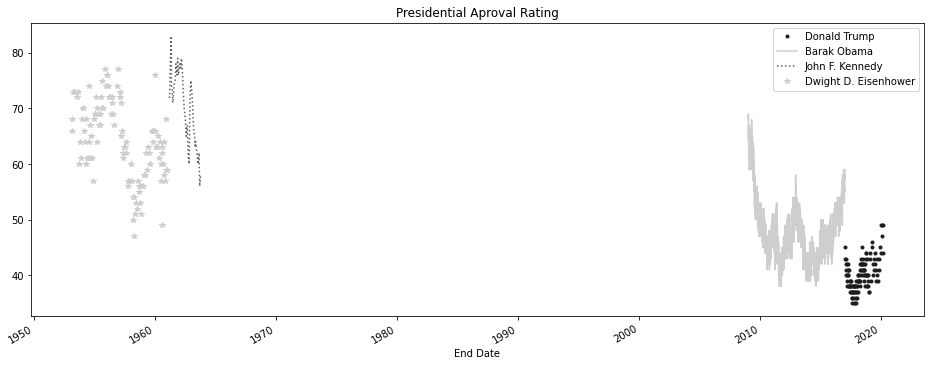

In [0]:
from matplotlib import cm
fig,ax=plt.subplots(figsize=(16,6))
styles=['.','-',':','*']
colors=[.9,.3,.7,.3,.9]
groups=FourPresidents.groupby('President',sort=False)
for style, color, (pres,df) in zip(styles,colors,groups):
                    df.plot('End Date','Approving',ax=ax,label=pres,style=style,
                            color=cm.Greys(color),title='Presidential Aproval Rating')

In [0]:
Obj90Days=FourPresidents.groupby('President',sort=False).rolling('90D',on='End Date')['Approving'].mean()
Obj90Days.head(15)

President     End Date  
Donald Trump  2020-03-22    49.000000
              2020-03-13    46.500000
              2020-02-28    46.666667
              2020-02-16    47.250000
              2020-01-29    47.600000
              2020-01-15    47.000000
              2019-12-15    46.333333
              2019-11-14    45.250000
              2019-10-31    43.250000
              2019-10-13    42.000000
              2019-09-30    41.600000
              2019-09-15    41.200000
              2019-08-30    40.833333
              2019-08-14    40.500000
              2019-07-31    40.666667
Name: Approving, dtype: float64

In [0]:
Obj50Days=FourPresidents.groupby('President',sort=False).rolling('50D',on='End Date')['Approving'].mean()
Obj50Days.head(15)

President     End Date  
Donald Trump  2020-03-22    49.000000
              2020-03-13    46.500000
              2020-02-28    46.666667
              2020-02-16    47.250000
              2020-01-29    47.250000
              2020-01-15    47.250000
              2019-12-15    46.000000
              2019-11-14    44.000000
              2019-10-31    43.000000
              2019-10-13    41.000000
              2019-09-30    40.750000
              2019-09-15    40.750000
              2019-08-30    40.250000
              2019-08-14    40.750000
              2019-07-31    41.250000
Name: Approving, dtype: float64

In [0]:
# https://medium.com/datactw/imdb-dataset-visualization-data-analytics-using-pandas-97b5c6f03c6d
# https://www.kaggle.com/danofer/movies-data-clean
# https://github.com/Hindhuja-Gutha/Investigate_TMDB_Movie_data_set
# https://books.google.com.co/books?id=_NCBDwAAQBAJ&pg=PA617&lpg=PA617&dq=colors%3D+.9+.3+.7+.3+.9+python+matplotlib&source=bl&ots=Q1IZALIPsE&sig=ACfU3U1H1RI57UvvP_o2IyE5JDgSVRj1nw&hl=es&sa=X&ved=2ahUKEwjQgrqR3sXoAhXPnOAKHSRkBgUQ6AEwAHoECAwQLg#v=onepage&q=colors%3D%20.9%20.3%20.7%20.3%20.9%20python%20matplotlib&f=false